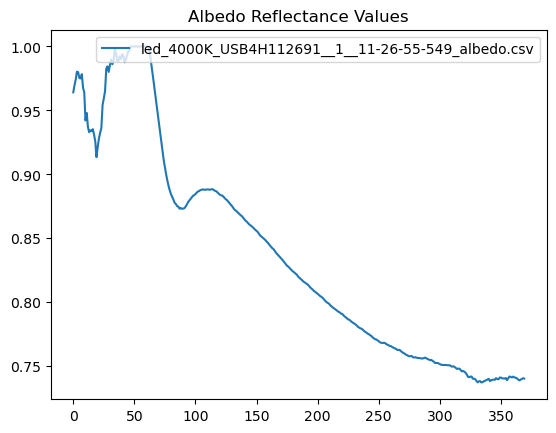

Processed led_4000K_USB4H112691__1__11-26-55-549_albedo.csv: XYZ = [ 0.99106183  0.99832417  1.12847507]


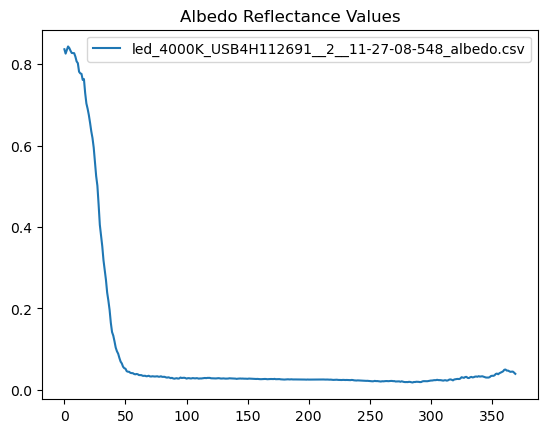

Processed led_4000K_USB4H112691__2__11-27-08-548_albedo.csv: XYZ = [ 0.03663303  0.03172726  0.06443719]


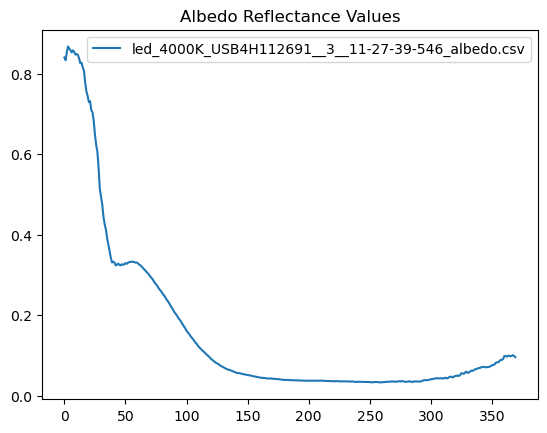

Processed led_4000K_USB4H112691__3__11-27-39-546_albedo.csv: XYZ = [ 0.09654885  0.0626707   0.32460412]


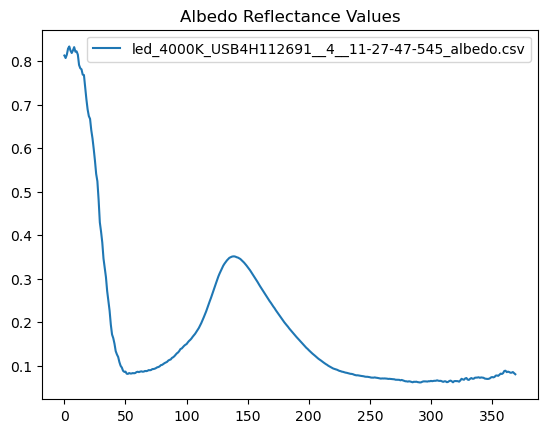

Processed led_4000K_USB4H112691__4__11-27-47-545_albedo.csv: XYZ = [ 0.15070206  0.2385468   0.15732107]


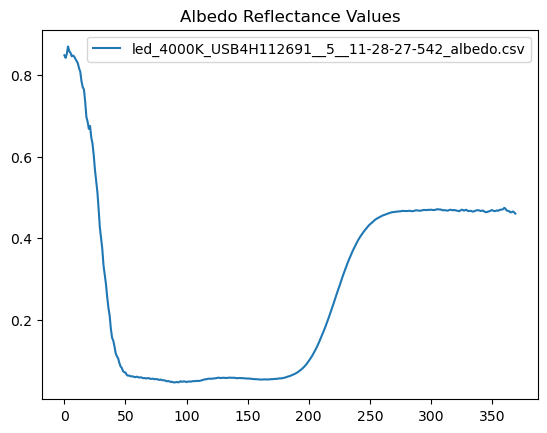

Processed led_4000K_USB4H112691__5__11-28-27-542_albedo.csv: XYZ = [ 0.25075218  0.15402507  0.08838265]


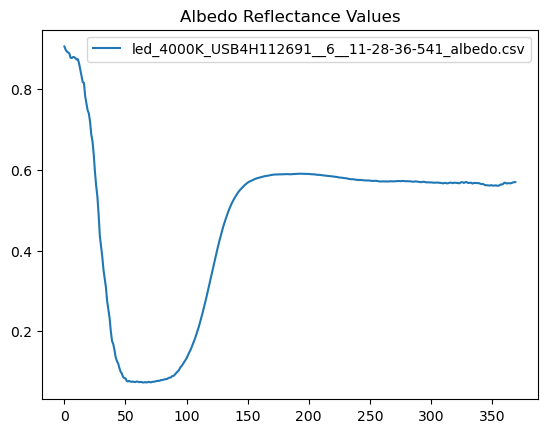

Processed led_4000K_USB4H112691__6__11-28-36-541_albedo.csv: XYZ = [ 0.60631509  0.65535171  0.15231228]


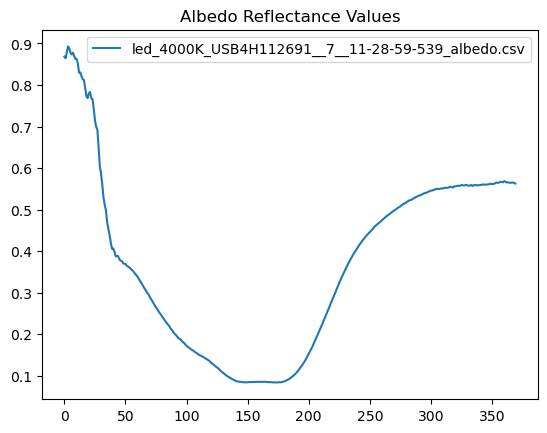

Processed led_4000K_USB4H112691__7__11-28-59-539_albedo.csv: XYZ = [ 0.33495187  0.20776421  0.34058301]


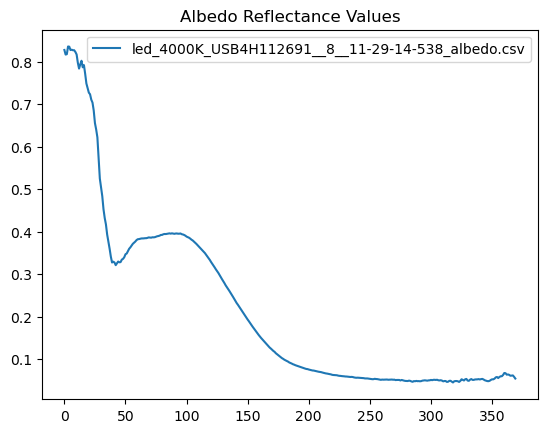

Processed led_4000K_USB4H112691__8__11-29-14-538_albedo.csv: XYZ = [ 0.15316509  0.16848359  0.45604604]
led_4000K_USB4H112691__1__11-26-55-549_albedo.csv: [ 0.99106183  0.99832417  1.12847507]
led_4000K_USB4H112691__2__11-27-08-548_albedo.csv: [ 0.03663303  0.03172726  0.06443719]
led_4000K_USB4H112691__3__11-27-39-546_albedo.csv: [ 0.09654885  0.0626707   0.32460412]
led_4000K_USB4H112691__4__11-27-47-545_albedo.csv: [ 0.15070206  0.2385468   0.15732107]
led_4000K_USB4H112691__5__11-28-27-542_albedo.csv: [ 0.25075218  0.15402507  0.08838265]
led_4000K_USB4H112691__6__11-28-36-541_albedo.csv: [ 0.60631509  0.65535171  0.15231228]
led_4000K_USB4H112691__7__11-28-59-539_albedo.csv: [ 0.33495187  0.20776421  0.34058301]
led_4000K_USB4H112691__8__11-29-14-538_albedo.csv: [ 0.15316509  0.16848359  0.45604604]


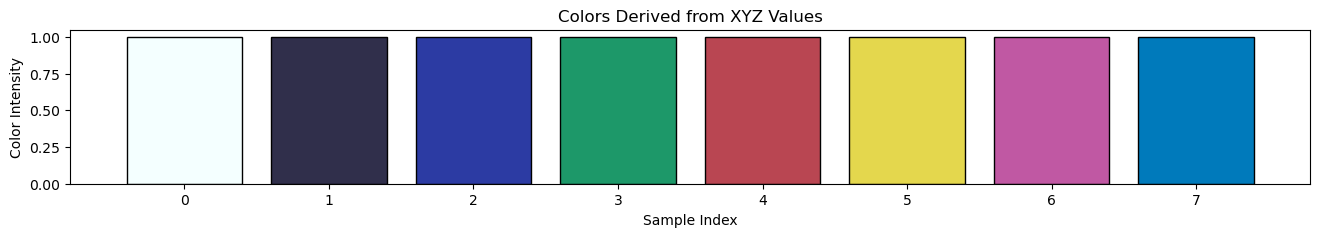

In [1]:
import os
import colour
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Function to convert spectral reflectance values to CIE XYZ values
def passage_spectre_XYZ(valeurs_alb):
    """
    Convert spectral reflectance values to XYZ values using the CIE 1931 2 Degree Standard Observer.
    
    Parameters:
        valeurs_alb (array): Reflectance values corresponding to wavelengths.

    Returns:
        XYZ (array): Calculated XYZ values.
    """
    cmfs = colour.MSDS_CMFS['CIE 1931 2 Degree Standard Observer']
    wavelengths = cmfs.wavelengths
    mask = (wavelengths >= 380) & (wavelengths <= 749)  # Filter wavelengths from 380 nm to 749 nm
    wavelengths = wavelengths[mask]

    if len(wavelengths) == len(valeurs_alb):
        X_sensitivity = cmfs.values[mask, 0]
        Y_sensitivity = cmfs.values[mask, 1]
        Z_sensitivity = cmfs.values[mask, 2]

        # Compute XYZ values using weighted integration
        X = np.trapz(valeurs_alb * X_sensitivity, wavelengths)
        Y = np.trapz(valeurs_alb * Y_sensitivity, wavelengths)
        Z = np.trapz(valeurs_alb * Z_sensitivity, wavelengths)

        XYZ = np.array([X, Y, Z]) * 0.0113  # Normalize XYZ values
        return XYZ
    else:
        raise ValueError(
            f"Length mismatch: wavelengths ({len(wavelengths)}) and valeurs_alb ({len(valeurs_alb)})."
        )

# Function to read albedo values from a CSV file
def lire_albedo_csv(fichier_csv):
    """
    Read albedo values from a CSV file.

    Parameters:
        fichier_csv (str): Path to the CSV file.

    Returns:
        albedo_values (array): Albedo values from the second column.
    """
    data = pd.read_csv(fichier_csv)
    albedo_values = data.iloc[:, 1].values  # Assume the second column contains albedo values
    return albedo_values

# Function to process all CSV files in a folder
def process_folder(folder_path):
    """
    Process all CSV files in a folder to calculate XYZ values.

    Parameters:
        folder_path (str): Path to the folder containing CSV files.

    Returns:
        results (list): List of tuples with file names and XYZ values.
    """
    results = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):
            file_path = os.path.join(folder_path, file_name)
            try:
                albedo = lire_albedo_csv(file_path)
                plt.plot(albedo, label=file_name)
                plt.title("Albedo Reflectance Values")
                plt.legend()
                plt.show()

                XYZ = passage_spectre_XYZ(albedo)
                results.append((file_name, XYZ))
                print(f"Processed {file_name}: XYZ = {XYZ}")
            except Exception as e:
                print(f"Error processing {file_name}: {e}")
    return results

# Main folder path containing albedo CSV files
folder_path = "C:/Users/brahim/OneDrive - Institut Optique Graduate School/projet apparence spectrale/mesure_projet_blender/fiber/output/albedo"
all_results = process_folder(folder_path)

# Save results to a list
albedo_xyz_values_list = [xyz for _, xyz in all_results]

# Display results
for file, albedo_xyz in all_results:
    print(f"{file}: {albedo_xyz}")

# Define the reference white point (D65 illuminant)
XYZ_D65 = [0.9505, 1.00, 1.0888]

# Initialize a NumPy array to store scaled XYZ values
scaled_XYZ_values = np.zeros((len(albedo_xyz_values_list), 3))

# Scale XYZ values by D65 white point
for i, XYZ in enumerate(albedo_xyz_values_list):
    scaled_XYZ_values[i] = XYZ * XYZ_D65

# Function to convert XYZ to RGB
def xyz_to_rgb(XYZ):
    """
    Convert XYZ values to RGB values in the sRGB color space.

    Parameters:
        XYZ (array): XYZ values.

    Returns:
        RGB (array): Gamma-corrected RGB values.
    """
    M = np.array([
        [3.2406, -1.5372, -0.4986],
        [-0.9689, 1.8758, 0.0415],
        [0.0557, -0.2040, 1.0570]
    ])

    RGB = np.dot(M, XYZ)
    RGB = np.clip(RGB, 0, 1)  # Clip values to [0, 1]

    # Apply gamma correction
    gamma_corrected = np.where(RGB <= 0.0031308, 
                               12.92 * RGB, 
                               1.055 * (RGB ** (1 / 2.4)) - 0.055)
    return gamma_corrected

# Function to display color for given XYZ values
def display_color(XYZ):
    """
    Display a color patch for given XYZ values.

    Parameters:
        XYZ (array): XYZ values.
    """
    RGB = xyz_to_rgb(XYZ)
    plt.figure(figsize=(2, 2))
    plt.imshow([[RGB]], extent=(0, 1, 0, 1))
    plt.title(f"Color (XYZ = {np.round(XYZ, 3)})")
    plt.axis("off")
    plt.show()

# Plot all colors in a single figure
plt.figure(figsize=(16, 2))
for i, XYZ in enumerate(scaled_XYZ_values):
    RGB = xyz_to_rgb(XYZ)
    plt.bar(i, 1, color=RGB, edgecolor="black")
plt.title("Colors Derived from XYZ Values")
plt.xlabel("Sample Index")
plt.ylabel("Color Intensity")
plt.show()
